# SAM 2: Segment Anything in Images and Videos - Paper reproduction 


The paper presents Segment Anything Model 2 (SAM2), a model designed for promptable visual segmentation in images and videos. The model extends Segment Anything (SAM) from static images to dynamic video sequences and deals with  challenges such as motion, occlusion, and varying lighting conditions.

Paper: “SAM 2: Segment Anything in Images and Videos,” 2024 [1]

### Links:
- Paper: [arXiv 2408.00714v2](https://arxiv.org/pdf/2408.00714.pdf)
- Official Code: [GitHub Repository](https://github.com/facebookresearch/sam2)
- Notebooks with code to Rerun(complete code implementations) : [https://github.com/facebookresearch/sam2/tree/main/notebooks]
- Demo: [SAM2 Demo](https://sam2.metademolab.com)

## SAM 
NOTE: This is a little apart from the paper itself but I shall explain what is SAM in general to be able to explain SAM 2.
#### What is SAM? 
The Segment Anything Model (SAM) is a foundation model for image segmentation developed by Meta AI (Facebook AI Research - FAIR). It was introduced in April 2023 and is designed to segment any object in an image based on user input. (Kirillov et al., 2023)[2]

SAM is built on the concept of "promptable segmentation", meaning it can take different types of user inputs (like clicks, boxes, or masks) and automatically segment objects accordingly. Unlike traditional segmentation models, SAM is general-purpose and zero-shot, meaning it does not require retraining for new images or objects.
#### Key features of SAM
1. Promptable Segmentation
SAM can segment objects using different types of prompts:
- Click-based prompts (single or multiple points on an object).
- Bounding box prompts (selecting a region containing an object).
- Pre-existing mask prompts (refining a given segmentation mask).
- This makes SAM flexible and interactive, allowing users to guide the segmentation process.

2. Zero-Shot Generalization
- SAM is trained on a massive dataset (SA-1B) with 1 billion masks from diverse images.
- Because of this, it can segment objects it has never seen before without additional training.
- Works across a wide range of domains, from everyday objects to medical images.

3. High-Speed Segmentation
- Real-time processing: SAM can generate segmentation masks within milliseconds.
- Uses an efficient Transformer-based architecture for fast computations.
- Designed to work interactively, meaning users can refine the segmentation live.

4. Scalable and Open-Source
- Pre-trained models are freely available via GitHub.
- Can be fine-tuned for specific tasks if needed.
- Supports multiple platforms, including cloud-based APIs and on-device implementations.

#### How it works

1. Image Encoding
- The input image is processed using a Vision Transformer (ViT-based encoder).
- This extracts feature embeddings, which contain detailed object information.

2. Prompt Encoding
- The user provides a prompt (a click, box, or mask).
- This helps the model understand which object(s) to segment.

3. Mask Prediction
- A lightweight decoder processes the image and prompt embeddings.
- SAM outputs one or multiple segmentation masks for the object(s).
- If there is ambiguity, it provides multiple mask options.

#### What is it used for?
1. Medical Imaging
- Automatically detects tumors, organs, and abnormalities in scans.
- Assists radiologists and doctors in diagnosis.

2. Autonomous Vehicles
- Identifies pedestrians, cars, and obstacles in real-time.
- Helps self-driving cars navigate safely.

3. Augmented Reality (AR) and Virtual Reality (VR)
- Interactive segmentation for AR filters and VR environments.
- Enhances object recognition and interaction.

4. Video Editing & Content Creation
- Auto-masking for objects, making background removal seamless.
- AI-assisted video editing for professional filmmakers.

5. Robotics & Industrial Automation
- Helps robots recognize objects in warehouses and factories.
- Reduces errors in automated assembly lines.

6. Scientific Research
- Satellite image segmentation for environmental studies.
- Wildlife tracking in conservation projects

SAM is a revolutionary foundation model for image segmentation, capable of zero-shot learning, high-speed segmentation, and interactive prompting. SAM2 builds on this foundation, extending its capabilities to video segmentation, making it even more powerful for real-world applications.

## SAM 2

#### What is SAM2? 
The Segment Anything Model 2 (SAM2) is an advanced promptable visual segmentation model that builds upon Segment Anything Model (SAM). SAM was designed for interactive image segmentation, allowing users to segment objects using clicks, boxes, or masks. However, SAM was limited to static images and did not handle videos effectively.

SAM2 solves this limitation by introducing streaming memory, which enables accurate segmentation of objects across multiple video frames. It is capable of tracking, segmenting, and refining objects in videos with minimal user interaction. 
#### Why was it needed? 
Current segmentation models struggle with videos due to motion, occlusion, lighting changes, and varying quality. The original SAM could only handle single images, lacking the ability to remember objects across frames. Also Existing video segmentation models require significant user interaction and struggle with generalization. A universal segmentation model is needed for both images and videos, which SAM2 provides.

#### Main findings 
SAM2 significantly improves both accuracy and efficiency in segmentation tasks by introducing the following innovations:

1. A Unified Model for Images and Videos
- SAM2 generalizes SAM to the video domain, allowing users to segment objects interactively across multiple frames.
- It can work on both static images and video frames, treating an image as a single-frame video.

2. Streaming Memory for Object Tracking
- SAM2 uses memory attention to recall objects from previous frames, maintaining object identity across the video.
- The model refines its segmentation dynamically, reducing the number of manual corrections needed.

3. Largest Video Segmentation Dataset (SA-V)
- The team collected the largest-ever video segmentation dataset, called SA-V, SA-V contains:
- 50.9K videos and 35.5 million segmentation masks
- A wide variety of real-world scenes, making it 53× larger than previous datasets.
- This dataset enables SAM2 to learn from diverse scenarios, improving generalization.

4. Faster and More Efficient Segmentation
SAM2 is 6× faster than SAM for image segmentation.
For video segmentation, SAM2 requires 3× fewer user interactions, reducing the need for manual corrections.
Real-time performance enables seamless interaction, making it useful in practical applications.


## How does it work and what is the architecture? 
SAM2 (Segment Anything Model 2) is a transformer-based segmentation model that extends SAM to work with both images and videos. It introduces a memory mechanism to recall past segmentation results, enabling efficient object tracking over time.


#### Model Architecture
The core of SAM2 consists of:
1. Transformer-Based Image Encoder
- Processes images using a Vision Transformer (ViT).
- Extracts feature embeddings, which help the model understand object boundaries, colors, and textures.

2. Memory Bank & Memory Encoder
- Stores past segmentation masks to enable smooth video tracking.
- Uses a memory attention mechanism to recall past frames and prevent object loss.
- Helps in reducing segmentation errors caused by motion or occlusion.

3. Prompt Encoder
- Converts user input (clicks, boxes, masks) into a mathematical representation.
- These prompt embeddings guide the segmentation process.

4. Mask Decoder that generates segmentation masks based on:
- Image features
- User prompt
- Memory from previous frames
- If a user adjusts the segmentation, the decoder updates the mask accordingly.


You can see how it works in figure b) below.

#### How does it work

1. User Provides a Prompt (Click, Box, or Mask)
- The user interacts with SAM2 by selecting an object in an image or video using:
- Clicks (positive/negative points)
- Bounding boxes
- Masks
- This serves as a guidance input to tell SAM2 what needs to be segmented.

2. Image Encoder Extracts Features
- The image (or video frame) is processed through a Vision Transformer (ViT).
- The encoder extracts deep feature embeddings, which capture object boundaries, textures, and spatial information.

3. Memory Encoder & Bank Stores Previous Frames
- Unlike SAM, SAM2 has a memory module that remembers past segmentations.
- This memory bank allows it to track objects across video frames.


How Memory Works:
- Stores features of segmented objects. 
- Attends to past frames using memory attention.
- Enables better object tracking, even when objects move or are occluded.

4. Prompt Encoder Understands User Input
- The prompt encoder processes the user’s click, box, or mask.
- Converts the prompt into an embedding that is sent to the mask decoder.

5. Mask Decoder Predicts the Segmentation
- Using image features, past memory, and user input, SAM2 generates a segmentation mask.
- If there’s ambiguity, SAM2 predicts multiple masks.
- The best mask is selected based on predicted Intersection over Union (IoU) score.

6. Memory Bank Updates for Next Frames
- The segmentation result is stored in the memory bank.
- When a new frame appears, the model retrieves stored information from past frames.
- This allows smooth segmentation across video frames without restarting from scratch.

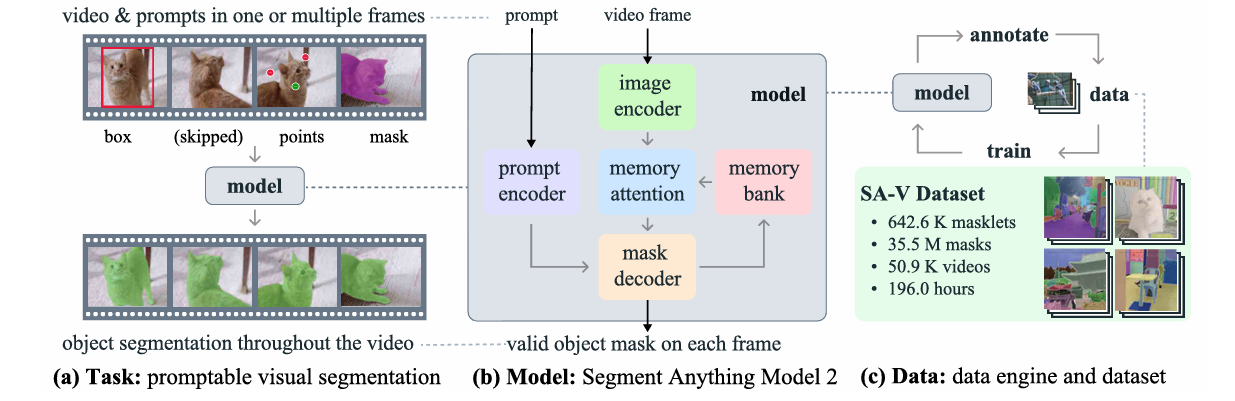

The authors give this picture as an illustration of what their model does. In general, the model is tasked with promptable visual segmentation a). The model is trained on the large-scale SA-V dataset collected through their data engine (c).
 SAM 2 is capable of interactively segmenting regions through prompts (clicks, boxes, or masks) on one or multiple video frames by utilizing a streaming memory that stores previous prompts and predictions. 

#### More on the SAM2 Architecure: 

 In the picture below there is further explanation on the architecure. For a given frame, the segmentation prediction is conditioned on the current prompt
 and/or on previously observed memories. Videos are processed in a streaming fashion with frames being consumed one
 at a time by the image encoder, and cross-attended to memories of the target object from previous frames. The mask
 decoder, which optionally also takes input prompts, predicts the segmentation mask for that frame. Finally, a memory encoder transforms the prediction and image encoder embeddings (not shown in the figure) for use in future frames.

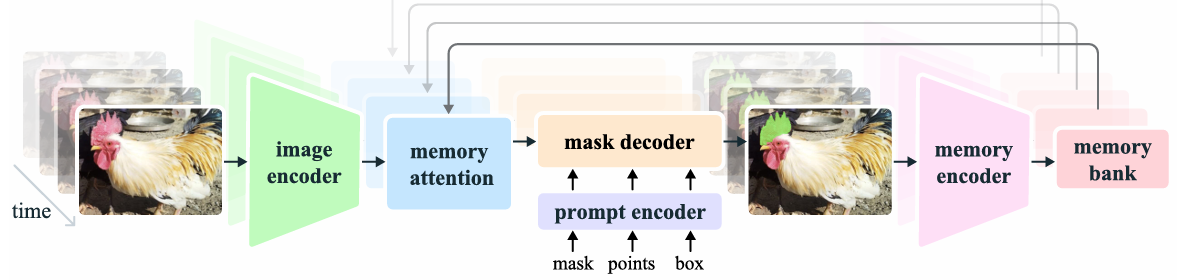

#### The PSV Task

The Promptable Visual Segmentation (PVS) task extends Segment Anything (SA) from images to videos, allowing interactive segmentation and tracking of objects across entire videos. Using prompts like clicks or boxes, the model provides instant segmentation while focusing on valid objects with clear boundaries. Illustration can be seen below.

How PVS Works
- The user provides prompts (clicks, boxes, or masks) on any frame of a video.
- SAM2 immediately segments the object in that frame.
- The model automatically propagates the segmentation across multiple frames.
- If needed, the user can refine the segmentation with additional prompts.


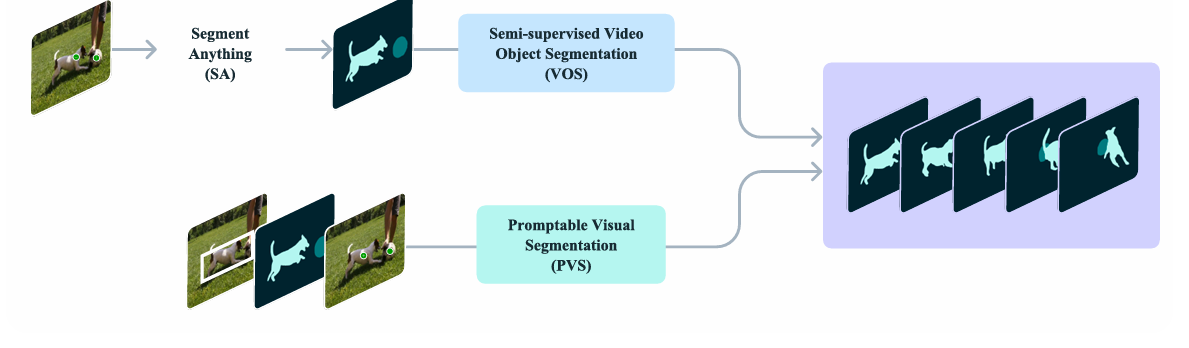

#### Important Math exlpanations 

**1. Segmentation Mask Prediction** $$M = f(E, P , M_{prev})$$ 

Where: 
- $M$ is the predicted segmentation mask
- $E$ is the image embedding(features from VIT)
- $P$ is the user prompt and $M_{prev}$ is past memory
- $f$ is Mask decoder function that generates the segmentation mask

The function $f$ applies a deep neural network transformation (i.e., through a transformer model) to combine image features, user prompts, and memory from past frames, producing a precise segmentation mask.

**2. Memory Attention Mechanism:** To track an object in a video, SAM2 stores information from previous frames using a memory attention mechanism. The attention mechanism follows the classic query-key-value structure used in transformers $$A_{t} = softmax(\frac{QK^T}{\sqrt{d}}) V$$
, Where:
- $At$ Attention score matrix at time step $t$ (how much the current frame relies on past frames)
- $Q$  Query matrix (representing the current frame's segmentation features)
- $K$ Key matrix (holding past frames' segmentation features from memory)
- $V$ Value matrix (stores the segmentation masks of past frames)
- $d$  Scaling factor (prevents extremely large values in attention computation)

- The attention score determines how relevant past frames are to the current frame. This helps SAM2 maintain object identity over time, even if objects move or are partially occluded. This method allows SAM2 to track objects more accurately than traditional segmentation models, which process each frame independently.

**3. Intersection Over Union (IoU) for Mask Quality**
To evaluate how well SAM2 predicts masks, it uses Intersection over Union (IoU): $$IoU = \frac{M_{pred} \cap M_{gt}}{M_{pred} \cup M_{gt}}$$

Where,
- ${M_{pred}$ Predicted segmentation mask
- $ M_{gt}$ Ground truth segmentation mask
- $\cap$  Intersection (overlapping region between predicted and actual mask)
- $\cup$  Union (total region covered by both masks)

Key Concept:
- IoU = 1.0 -> Perfect segmentation (Predicted mask perfectly overlaps with ground truth)
- IoU = 0.0 -> Total failure (No overlap at all)
- Higher IoU means better segmentation accuracy.

## The SA-V dataset
The SA-V Dataset (Segment Anything for Videos) is the largest video segmentation dataset ever created. It was built to train SAM2, enabling it to learn how to segment and track objects across frames with minimal user interaction. Containing:
- 50.9K videos
- 35.5 million segmentation masks
- 642.6K masklets (small segmented regions within frames)
- 196.0 hours of annotated video data

This dataset is 53× larger than previous video segmentation datasets, making SAM2 significantly more accurate and generalizable.
#### How Data Was Collected
The dataset was built using a three-phase pipeline, starting from manual human annotation and gradually moving to AI-assisted and fully-automated annotation using SAM2 itself.

1. Phase 1: Manual Annotation
- Human annotators used SAM to create segmentations one frame at a time.
- This was slow but highly accurate.

2. Phase 2: AI-Assisted Annotation
- The team trained a preliminary version of SAM2 on the initial data.
- Annotators used SAM2 to segment objects and manually refined errors.
- This made the process 5× faster.

3. Phase 3: Fully-Automated Annotation with SAM2
- Final version of SAM2 was used to generate masks automatically.
- Human annotators only corrected mistakes.
- This resulted in an 8.4× speed improvement compared to manual annotation.

#### Why was this done 
1. Generalization – The dataset includes diverse scenes, objects, lighting conditions, and motions, making SAM2 more adaptable.
2. Scalability – The automated annotation process enables massive dataset expansion without human effort.
3. Higher Accuracy – The combination of manual, AI-assisted, and fully automated labels improves segmentation precision.

## Experimental Results
- SAM2 achieves state-of-the-art accuracy on 37 segmentation benchmarks.
- It outperforms previous video segmentation models with fewer user inputs.
- 3× fewer interactions needed to refine segmentations compared to other models.
- 6× faster processing than SAM.
| *Model* | *User Inputs Needed* | *Accuracy* | *Processing speed* |
|-----------|-----------|-----------------|-----------------------|
| *SAM*  | More | High | Slow| 
| *Previous VOS models* | Very high | Medium | Medium |
| *SAM2* | 3x Less| Higher | 6x Faster |



## Limitations
 Despite its strengths, SAM2 has some limitations:
- Difficulty segmenting objects across shot changes or loses track of or confuses objects in crowded scenes. However you can prompt SAM2 on any frame, which can alleviate this issue. 
- Struggles with long occlusions or extended videos.
- Processes objects independently, lacking inter-object communication.
- Relies on human annotators for quality verification.
- Struggles with shot changes (e.g., when the camera cuts to a different angle).
- Thin or fast-moving objects can cause segmentation errors.
- Only processes one object at a time—future versions may include multi-object tracking.

## Code reproduction: Here

In [3]:
from transformers import SamModel, SamProcessor
import torch
from PIL import Image
import requests

# Load the SAM2 model and processor from Hugging Face
model_name = "facebook/sam-vit-huge"  # Replace with SAM2 model if available
processor = SamProcessor.from_pretrained(model_name)
model = SamModel.from_pretrained(model_name)

# Example: Load an image (Replace with a valid image URL)
image_url = "https://carwow-uk-wp-3.imgix.net/18015-MC20BluInfinito-scaled-e1707920217641.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)

# Process the image for SAM2
inputs = processor(images=image, return_tensors="pt")

# Perform segmentation
with torch.no_grad():
    outputs = model(**inputs)

# Print the model output keys
print(outputs.keys())


preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

C:\Users\asens\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\asens\.cache\huggingface\hub\models--facebook--sam-vit-huge. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.56G [00:00<?, ?B/s]

C:\Users\asens\anaconda3\Lib\site-packages\transformers\image_processing_utils.py:41: UserWarning: The following named arguments are not valid for `SamImageProcessor.preprocess` and were ignored: 'point_pad_value'
  return self.preprocess(images, **kwargs)


odict_keys(['iou_scores', 'pred_masks'])


## Conclusion
SAM2 is a major breakthrough in segmentation technology, extending SAM into the video domain. It significantly reduces human effort in annotation tasks. The SA-V dataset is the largest segmentation dataset ever created, providing a foundation for future research. SAM2 achieves state-of-the-art accuracy and efficiency, making it the best segmentation model currently available.

[1] SAM 2: Segment anything in images and videos. (2024). [Journal-article]. arXiv:2408.00714v2 [cs.CV] 28 Oct 2024. https://arxiv.org/abs/2408.00714v2

[2] Kirillov, A., Mintun, E., Ravi, N., Mao, H., Rolland, C., Gustafson, L., Xiao, T., Whitehead, S., Berg, A. C., Lo, W., Dollár, P., & Girshick, R. (2023). Segment anything. 2021 IEEE/CVF International Conference on Computer Vision (ICCV). https://doi.org/10.1109/iccv51070.2023.00371